![Graph](https://www.geeksforgeeks.org/wp-content/uploads/Fig-11.jpg)

In [1]:
# first we need positive infinity
import sys
sys.maxsize 

9223372036854775807

In [2]:
# so sys.maxsize is 2**63-1
2**(64-1)-1

9223372036854775807

In [3]:
# Python program for Dijkstra's single
# source shortest path algorithm. The program is
# for adjacency matrix representation of the graph
 
# Library for INT_MAX
# import sys
 
class Graph():
 
    def __init__(self, vertices):
        self.V = vertices
        # this is for the adjacency matrix we set 0 for the diagonal
        self.graph = [[0 for column in range(vertices)]
                    for row in range(vertices)]
        # let's also save path information - we only need to store the parent of each node
        self.parent = [-1]*vertices # initially all are -1
 
    def printSolution(self, dist):
        print("Vertex \tDistance from Source")
        for node in range(self.V):
            print(node, "\t", dist[node])
 
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    # hint: we can optimize this part using heap or priority queue
    def minDistance(self, dist, sptSet):
 
        # Initialize minimum distance for next node
        min = sys.maxsize
 
        # Search not nearest vertex not in the
        # shortest path tree
        for u in range(self.V):
            if dist[u] < min and sptSet[u] == False:
                min = dist[u]
                min_index = u
 
        return min_index
    
    # print path from src to dest
    def printPath(self, src, dest):
        # we will use while loop to print the path starting from the destination
        # we will use the parent array to print the path
        path = []
        path.append(dest)
        while self.parent[dest] != src:
            path.append(self.parent[dest])
            dest = self.parent[dest]
            if self.parent[dest] == -1:
                print("No path exists")
                return
        path.append(src)
        path.reverse()
        print(path)
 
    # Function that implements Dijkstra's single source
    # shortest path algorithm for a graph represented
    # using adjacency matrix representation
    def dijkstra(self, src):
 
        dist = [sys.maxsize] * self.V # originally everything is infinity
        dist[src] = 0  # this means that the src will be found by the code below
        sptSet = [False] * self.V # instead of set we are using a list
 
        for cout in range(self.V):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # x is always equal to src in first iteration
            x = self.minDistance(dist, sptSet)
 
            # Put the minimum distance vertex in the
            # shortest path tree
            sptSet[x] = True
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for y in range(self.V):
                if self.graph[x][y] > 0 and sptSet[y] == False and \
                dist[y] > dist[x] + self.graph[x][y]:
                        dist[y] = dist[x] + self.graph[x][y]
                        self.parent[y] = x # we needed to update the parent
 
        self.printSolution(dist)
        return dist
 
# Driver program
# we use a adjacency matrix representation
g = Graph(9)
g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
           [4, 0, 8, 0, 0, 0, 0, 11, 0],
           [0, 8, 0, 7, 0, 4, 0, 0, 2],
           [0, 0, 7, 0, 9, 14, 0, 0, 0],
           [0, 0, 0, 9, 0, 10, 0, 0, 0],
           [0, 0, 4, 14, 10, 0, 2, 0, 0],
           [0, 0, 0, 0, 0, 2, 0, 1, 6],
           [8, 11, 0, 0, 0, 0, 1, 0, 7],
           [0, 0, 2, 0, 0, 0, 6, 7, 0]
        ];
 
solution = g.dijkstra(0);
 
# This code is contributed by Divyanshu Mehta and Updated by Pranav Singh Sambyal

Vertex 	Distance from Source
0 	 0
1 	 4
2 	 12
3 	 19
4 	 21
5 	 11
6 	 9
7 	 8
8 	 14


In [4]:
g.printPath(0,8)

[0, 1, 2, 8]


In [5]:
g.printPath(0,4)

[0, 7, 6, 5, 4]


In [6]:
sys.maxsize # 64bit signed infinity :)

9223372036854775807

In [ ]:
2**63

9223372036854775808

In [7]:
    # Driver program
g = Graph(4)
g.graph =   [[0, 4, 0, 0],
             [4, 0, 8, 2],
             [0, 8, 0, 7],
             [0, 2, 7, 0],
         ];
  
g.dijkstra(0);

Vertex 	Distance from Source
0 	 0
1 	 4
2 	 12
3 	 6


In [6]:
g.dijkstra(3)

Vertex 	Distance from Source
0 	 6
1 	 2
2 	 7
3 	 0


## NetworkX library

NetworkX is a well known graph algorithms library in Python

* documentation: https://networkx.github.io/documentation/stable/index.html

In [8]:
# let's try importing networkx

try:
    import networkx as nx
except:
    print("networkx not installed")
    print("Install it using: pip install networkx")

networkx not installed
Install it using: pip install networkx


In [9]:
!pip install networkx

  Obtaining dependency information for networkx from https://files.pythonhosted.org/packages/b9/54/dd730b32ea14ea797530a4479b2ed46a6fb250f682a9cfb997e968bf0261/networkx-3.4.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.5 MB/s eta 0:00:0000:01

[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [10]:
import networkx as nx
# let's create a graph
G = nx.Graph()

In [11]:
# we can use matplotlib to draw the graph
import matplotlib.pyplot as plt


In [12]:
# We will initialize the graph with Petersen graph which is a well known graph in graph theory
G = nx.petersen_graph() # https://en.wikipedia.org/wiki/Petersen_graph useful for counterexamples

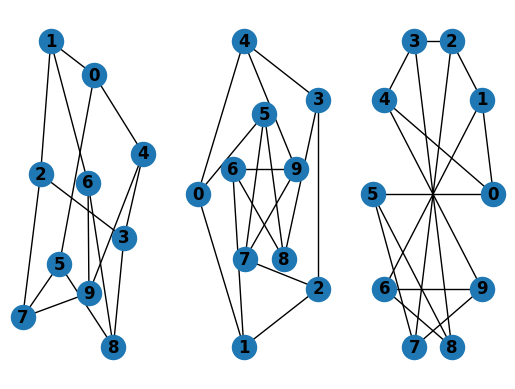

In [13]:
plt.subplot(131)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(132)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.subplot(133)
nx.draw_circular(G, with_labels=True, font_weight='bold')


![Graph](https://www.geeksforgeeks.org/wp-content/uploads/Fig-11.jpg)

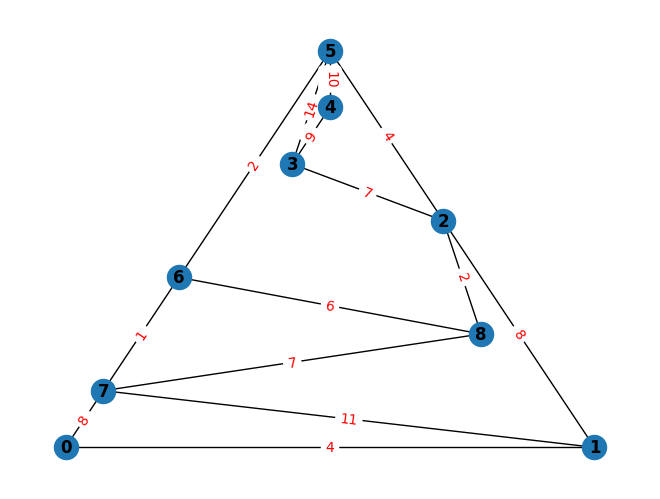

In [14]:
G = nx.Graph()  # initialize an empty networkx Graph
G.add_weighted_edges_from([(0,1,4),(0,7,8),(2,8,2),
                           (7,6,1),(8,6,6),
                           (6,5,2),(5,4,10),(7,8,7),
                           (7,1,11),(1,2,8),(2,3,7),(2,5,4),(3,5,14),(4,3,9)])
# pos=nx.shell_layout(G)
# https://networkx.org/documentation/stable/reference/drawing.html
pos=nx.planar_layout(G)
nx.draw(G, pos=pos, with_labels=True, font_weight='bold') 
# so we had to pass pos to the draw method that uses matplotlib underneath
edge_labels = nx.get_edge_attributes(G,'weight') # key is edge, pls check for your case
formatted_edge_labels = {(elem[0],elem[1]):edge_labels[elem] for elem in edge_labels} # use this to modify the tuple keyed dict if it has > 2 elements, else ignore
out = nx.draw_networkx_edge_labels(G,pos,edge_labels=formatted_edge_labels,font_color='red')

In [12]:
pos

{0: array([-1.00000000e+00, -8.74227766e-08]),
 1: array([-0.76604432, -0.64278775]),
 7: array([-0.17364813, -0.98480779]),
 2: array([ 0.49999991, -0.86602545]),
 8: array([ 0.93969256, -0.34202036]),
 6: array([0.93969256, 0.34202024]),
 5: array([0.49999961, 0.86602563]),
 4: array([-0.17364848,  0.98480767]),
 3: array([-0.76604456,  0.64278752])}

In [ ]:
type(out)

dict

### Solving NetworkX graph with built in Dijkstra

In [15]:
length, path = nx.single_source_dijkstra(G, 0) # we supply the graph and the source node
# we get the length and the path

In [21]:
type(length)

dict

In [16]:
# length is a dictionary of the shortest path lengths from the source node (which is 0 in this case)
length

{0: 0, 1: 4, 7: 8, 6: 9, 5: 11, 2: 12, 8: 14, 3: 19, 4: 21}

In [17]:
# how about path?
path

{0: [0],
 1: [0, 1],
 7: [0, 7],
 2: [0, 1, 2],
 6: [0, 7, 6],
 8: [0, 1, 2, 8],
 5: [0, 7, 6, 5],
 4: [0, 7, 6, 5, 4],
 3: [0, 1, 2, 3]}

### Using Pandas to store results

In [19]:
# try importing pandas
try:
    import pandas as pd
except:
    print("pandas not installed")
    print("Install it using: pip install pandas") # there are many options to install pandas

pandas not installed
Install it using: pip install pandas


In [20]:
!pip install pandas

  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/38/f8/d8fddee9ed0d0c0f4a2132c1dfcf0e3e53265055da8df952a53e7eaf178c/pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.1 MB/s eta 0:00:00
  Obtaining dependency information for pytz>=2020.1 from https://files.pythonhosted.org/packages/11/c3/005fcca25ce078d2cc29fd559379817424e94885510568bc1bc53d7d5846/pytz-2024.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tzdata>=2022.7 from https://files.pythonhosted.org/packages/a6/ab/7e5f53c3b9d14972843a647d8d7a853969a58aecc7559cb3267302c94774/tzdata-2024.2-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 67.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 11.8 MB/s eta 0:00:00

[notice] A n

In [21]:
# Pandas is a powerful data manipulation library (with NumPy underneath)
import pandas as pd
df = pd.DataFrame(length.items(), columns=["vertex", "cost"])
df

,vertex,cost
0,0,0
1,1,4
2,7,8
3,6,9
4,5,11
5,2,12
6,8,14
7,3,19
8,4,21


In [22]:
df["og_cost"] = solution
df # so looks the solution is the same just that our nodes are of different numbering

,vertex,cost,og_cost
0,0,0,0
1,1,4,4
2,7,8,12
3,6,9,19
4,5,11,21
5,2,12,11
6,8,14,9
7,3,19,8
8,4,21,14


In [23]:
# we can compare two columns using regular Python (there might a Pandas way too)
# so sorting is useful
sorted(df.cost.to_list()) == sorted(df.og_cost.to_list())

True

In [24]:
# lets fix this bug we had wrong ordering
sorted_lengths = sorted(length.items())
sorted_lengths

[(0, 0), (1, 4), (2, 12), (3, 19), (4, 21), (5, 11), (6, 9), (7, 8), (8, 14)]

In [25]:
df = pd.DataFrame(sorted_lengths, columns=["vertex", "cost"])
df

,vertex,cost
0,0,0
1,1,4
2,2,12
3,3,19
4,4,21
5,5,11
6,6,9
7,7,8
8,8,14


In [26]:
df["og_cost"] = solution
df

,vertex,cost,og_cost
0,0,0,0
1,1,4,4
2,2,12,12
3,3,19,19
4,4,21,21
5,5,11,11
6,6,9,9
7,7,8,8
8,8,14,14


In [32]:
# now we can see that the costs (minimum distances are indeed the same)
df.cost == df.og_cost # vectorized comparison

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
dtype: bool

In [ ]:
# TODO implement an optimized Dijkstra's algorithm using priority queue
# Idea is to keep nodes in a heap structure
# then our complexity reduces from θ(V^2) to θ(E + V*logV) # V meaning |V| which is the number of nodes/vertices
# E actually being number of edges == |E|

## Optimized Dijkstra with Priority Queue

In [3]:
import sys
# we will implement a priority queue using heapq

import heapq

# we will use a list to represent the priority queue
# we will use a tuple to represent the node and its distance from the source
# we will also use a set to keep track of visited nodes
# we will use a list to keep track of the distances
# we will use a list to keep track of the parents
# we will use a list to keep track of the graph

class Graph():
 
    def __init__(self, vertices, graph=None):
        # useful pseudo constants
        INF = sys.maxsize # 64bit signed infinity :) so 2**63-1
        # initialize the graph
        self.V = vertices
        if graph:
            self.graph = graph
        else:
            # empty graph would  make more sense to use infinity
            self.graph = [[INF for column in range(vertices)]
                        for row in range(vertices)]
            # TODO think about adjacency list representation
        # we will use a list to keep track of the parent to represent the path where we came from
        self.parent = [-1]*vertices
        self.dist = [sys.maxsize] * self.V # originally all distances are infinity
        # self.dist[src] = 0
        self.pq = [] # we will be supplying a list to heapq, heapq will take care of the rest
        self.visited = set() # again more efficient to use a set than list
 
    def printSolution(self, dist):
        print("Vertex \tDistance from Source")
        for node in range(self.V):
            print(node, "\t", dist[node])
     
    def printPath(self, src, dest):
        path = []
        path.append(dest)
        while self.parent[dest] != src:
            path.append(self.parent[dest])
            dest = self.parent[dest]
            if self.parent[dest] == -1:
                print("No path exists")
                return
        path.append(src)
        path.reverse()
        print(path)
 
    def dijkstra(self, src, verbose=False):
        self.dist[src] = 0
        # we push a single starting node to priority queue
        # we use a tuple to represent the node and its distance from the source
        # note the distance is the first element in the tuple
        # why? because we want to use the distance as the key for the priority queue
        heapq.heappush(self.pq, (0, src)) # logV operation # we started with empty pq
        while self.pq:
            dist, u = heapq.heappop(self.pq) # also logV operation
            if verbose and u not in self.visited:
                print(f"VERTEX u: {u} dist: {dist}, ADDING to visited: {self.visited}")
            self.visited.add(u)

            for v in range(self.V):
                if self.graph[u][v] > 0 and v not in self.visited and \
                self.dist[v] > self.dist[u] + self.graph[u][v]:
                    self.dist[v] = self.dist[u] + self.graph[u][v]
                    self.parent[v] = u
                    heapq.heappush(self.pq, (self.dist[v], v)) 
                    if verbose:
                        print(f"VERTEX v: {v} dist: {self.dist[v]}, ADDED to pq: {self.pq}")
        self.printSolution(self.dist)
        return self.dist

In [4]:
# let's do a simple 3 node graph to test our implementation
g = Graph(3)
g.graph = [[0, 4, 0],
           [4, 0, 8],
           [0, 8, 0]
        ];
g.dijkstra(0, verbose=True)

VERTEX u: 0 dist: 0, ADDING to visited: set()
VERTEX v: 1 dist: 4, ADDED to pq: [(4, 1)]
VERTEX u: 1 dist: 4, ADDING to visited: {0}
VERTEX v: 2 dist: 12, ADDED to pq: [(12, 2)]
VERTEX u: 2 dist: 12, ADDING to visited: {0, 1}
Vertex 	Distance from Source
0 	 0
1 	 4
2 	 12


[0, 4, 12]

In [29]:
g.printPath(0,2)

[0, 1, 2]


In [5]:
g = Graph(9)
g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
           [4, 0, 8, 0, 0, 0, 0, 11, 0],
           [0, 8, 0, 7, 0, 4, 0, 0, 2],
           [0, 0, 7, 0, 9, 14, 0, 0, 0],
           [0, 0, 0, 9, 0, 10, 0, 0, 0],
           [0, 0, 4, 14, 10, 0, 2, 0, 0],
           [0, 0, 0, 0, 0, 2, 0, 1, 6],
           [8, 11, 0, 0, 0, 0, 1, 0, 7],
           [0, 0, 2, 0, 0, 0, 6, 7, 0]
        ];
 
solution = g.dijkstra(0, verbose=True);
g.printPath(0,4)

VERTEX u: 0 dist: 0, ADDING to visited: set()
VERTEX v: 1 dist: 4, ADDED to pq: [(4, 1)]
VERTEX v: 7 dist: 8, ADDED to pq: [(4, 1), (8, 7)]
VERTEX u: 1 dist: 4, ADDING to visited: {0}
VERTEX v: 2 dist: 12, ADDED to pq: [(8, 7), (12, 2)]
VERTEX u: 7 dist: 8, ADDING to visited: {0, 1}
VERTEX v: 6 dist: 9, ADDED to pq: [(9, 6), (12, 2)]
VERTEX v: 8 dist: 15, ADDED to pq: [(9, 6), (12, 2), (15, 8)]
VERTEX u: 6 dist: 9, ADDING to visited: {0, 1, 7}
VERTEX v: 5 dist: 11, ADDED to pq: [(11, 5), (15, 8), (12, 2)]
VERTEX u: 5 dist: 11, ADDING to visited: {0, 1, 6, 7}
VERTEX v: 3 dist: 25, ADDED to pq: [(12, 2), (15, 8), (25, 3)]
VERTEX v: 4 dist: 21, ADDED to pq: [(12, 2), (15, 8), (25, 3), (21, 4)]
VERTEX u: 2 dist: 12, ADDING to visited: {0, 1, 5, 6, 7}
VERTEX v: 3 dist: 19, ADDED to pq: [(15, 8), (19, 3), (25, 3), (21, 4)]
VERTEX v: 8 dist: 14, ADDED to pq: [(14, 8), (15, 8), (25, 3), (21, 4), (19, 3)]
VERTEX u: 8 dist: 14, ADDING to visited: {0, 1, 2, 5, 6, 7}
VERTEX u: 3 dist: 19, ADDING t

## A* modification



In [13]:
# so A* will be Dijkstra with added heuristic
# heuristic is a guess of the distance from the current node to the destination
# main requirement is that this heuristic should be admissible - meaning it should never overestimate the distance, has to be optimistic

# let's implement A* algorithm
# we will use a priority queue to keep track of the nodes
# we will use a set to keep track of the visited nodes
# we will use a list to keep track of the distances

class Graph():
    # first initialize the graph
    def __init__(self, vertices, graph=None):
        # useful pseudo constants
        INF = sys.maxsize # 64bit signed infinity :) so 2**63-1
        # initialize the graph
        self.V = vertices
        if graph:
            self.graph = graph
        else:
            # empty graph would  make more sense to use infinity
            self.graph = [[INF for column in range(vertices)]
                        for row in range(vertices)]
            # TODO think about adjacency list representation
        # we will use a list to keep track of the parent to represent the path where we came from
        self.parent = [-1]*vertices
        self.dist = [sys.maxsize] * self.V # originally all distances are infinity
        # self.dist[src] = 0
        self.pq = [] # we will be supplying a list to heapq, heapq will take care of the rest
        self.visited = set() # again more efficient to use a set than list
        self.heuristic = [0]*vertices # we will initialize the heuristic to 0 - this would mean Dijkstra's algorithm by default

    def printSolution(self, dist):
        print("Vertex \tDistance from Source")
        for node in range(self.V):
            print(node, "\t", dist[node])

    def printPath(self, src, dest):
        path = []
        path.append(dest)
        while self.parent[dest] != src:
            path.append(self.parent[dest])
            dest = self.parent[dest]
            if self.parent[dest] == -1:
                print("No path exists")
                return
        path.append(src)
        path.reverse()
        print(path)
    
    def a_star(self, src, dest, verbose=False):
        self.dist[src] = 0
        # we push a single starting node to priority queue
        # we use a tuple to represent the node and its distance from the source
        # note the distance is the first element in the tuple
        # why? because we want to use the distance as the key for the priority queue
        heapq.heappush(self.pq, (0, src))
        while self.pq:
            dist, u = heapq.heappop(self.pq)
            if verbose:
                print(f"POPPED VERTEX u: {u} dist: {dist}")
            if u not in self.visited:
                self.visited.add(u)
                if verbose:
                    print(f"VERTEX u: {u} dist: {dist}, ADDED to visited: {self.visited}")
            # if u == dest: # so dest is for ending early when we reach the destination so we do not explore the whole graph
            #     break
            for v in range(self.V):
                if self.graph[u][v] > 0 and v not in self.visited and \
                self.dist[v] > self.dist[u] + self.graph[u][v]:
                    self.dist[v] = self.dist[u] + self.graph[u][v]
                    self.parent[v] = u
                    heapq.heappush(self.pq, (self.dist[v] + self.heuristic[v], v))
                    if verbose:
                        print(f"VERTEX v: {v} dist: {self.dist[v]}, ADDED to pq: {self.pq}")
        # print visited
        if verbose:
            print(f"Visited: {self.visited}")
        self.printSolution(self.dist)

# let's test our A* algorithm - for now it is just Dijkstra's algorithm

g = Graph(4)
g.graph =   [[0, 1, 0, 0],
             [1, 0, 5, 2],
             [0, 5, 0, 7],
             [0, 2, 7, 0],
         ];

g.a_star(0, 3, verbose=True)
                    
                        
                        

POPPED VERTEX u: 0 dist: 0
VERTEX u: 0 dist: 0, ADDED to visited: {0}
VERTEX v: 1 dist: 1, ADDED to pq: [(1, 1)]
POPPED VERTEX u: 1 dist: 1
VERTEX u: 1 dist: 1, ADDED to visited: {0, 1}
VERTEX v: 2 dist: 6, ADDED to pq: [(6, 2)]
VERTEX v: 3 dist: 3, ADDED to pq: [(3, 3), (6, 2)]
POPPED VERTEX u: 3 dist: 3
VERTEX u: 3 dist: 3, ADDED to visited: {0, 1, 3}
POPPED VERTEX u: 2 dist: 6
VERTEX u: 2 dist: 6, ADDED to visited: {0, 1, 2, 3}
Visited: {0, 1, 2, 3}
Vertex 	Distance from Source
0 	 0
1 	 1
2 	 6
3 	 3


In [14]:
# now let's make a graph with 5 nodes and here we will have a heuristic that is not 0
# our heuristic will be that the distance from the node to the destination is the node number

g = Graph(5)
g.graph = [[0, 4, 0, 0, 0],
           [4, 0, 8, 2, 0],
           [0, 8, 0, 7, 0],
           [0, 2, 7, 0, 1],
           [0, 0, 0, 1, 0]
        ];

# first let's solve this using Dijkstra's algorithm
g.a_star(0, 4, verbose=True)

POPPED VERTEX u: 0 dist: 0
VERTEX u: 0 dist: 0, ADDED to visited: {0}
VERTEX v: 1 dist: 4, ADDED to pq: [(4, 1)]
POPPED VERTEX u: 1 dist: 4
VERTEX u: 1 dist: 4, ADDED to visited: {0, 1}
VERTEX v: 2 dist: 12, ADDED to pq: [(12, 2)]
VERTEX v: 3 dist: 6, ADDED to pq: [(6, 3), (12, 2)]
POPPED VERTEX u: 3 dist: 6
VERTEX u: 3 dist: 6, ADDED to visited: {0, 1, 3}
VERTEX v: 4 dist: 7, ADDED to pq: [(7, 4), (12, 2)]
POPPED VERTEX u: 4 dist: 7
VERTEX u: 4 dist: 7, ADDED to visited: {0, 1, 3, 4}
POPPED VERTEX u: 2 dist: 12
VERTEX u: 2 dist: 12, ADDED to visited: {0, 1, 2, 3, 4}
Visited: {0, 1, 2, 3, 4}
Vertex 	Distance from Source
0 	 0
1 	 4
2 	 12
3 	 6
4 	 7


In [ ]:
# let's add heuristic to our A* algorithm
g.heuristic = [4, 3, 2, 1, 0] # so the heuristic is the distance from the node to the destination
# again heuristic should never overestimate the distance!! otherwise the algorithm will not be optimal - we will find a solution but it will not be the shortest path

# now let's solve this using A* algorithm
g.a_star(0, 4, verbose=True)

POPPED VERTEX u: 0 dist: 0
Visited: {0, 1, 2, 3, 4}
Vertex 	Distance from Source
0 	 0
1 	 4
2 	 12
3 	 6
4 	 7
